# Занятие 3. Иерархическая кластеризация.
Полезные ссылки:
https://docs.scipy.org/doc/scipy-0.14.0/reference/cluster.hierarchy.html
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
http://scikit-learn.org/stable/modules/clustering.html

In [212]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [213]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [214]:
from sklearn.cluster import KMeans

# Пример 1. Beverage


# Иерархическая кластеризация

In [215]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')

In [216]:
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


Применим алгоритм иерархической кластеризации и построим дендрограмму. Вычисления производятся функцией linkage. Аргументы функции: таблица данных, метод вычисления расстояний между кластерами (ward, single, complete, average) и метод вычисления расстояний между объектами (euclidean (default), cityblock aka Manhattan, hamming, cosine). См. документацию.

In [217]:
print(df)

          COKE  D_COKE  D_PEPSI  D_7UP  PEPSI  SPRITE  TAB  SEVENUP
numb.obs                                                           
1            1       0        0      0      1       1    0        1
2            1       0        0      0      1       0    0        0
3            1       0        0      0      1       0    0        0
4            0       1        0      1      0       0    1        0
5            1       0        0      0      1       0    0        0
6            1       0        0      0      1       1    0        0
7            0       1        1      1      0       0    1        0
8            1       1        0      0      1       1    0        1
9            1       1        0      0      0       1    1        1
10           1       0        0      0      1       0    0        1
11           1       0        0      0      1       1    0        0
12           0       1        0      0      0       0    1        0
13           0       0        1      1      0   

In [218]:


# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df, 'ward', 'euclidean')

# О библиотеке scipy (https://habr.com/ru/post/439288/)


Объект link представляет собой матрицу (n-1) x 4, где n -- число наблюдений. Каждая строка матрицы представляет собой результат слияния очередной пары кластеров с номерами link[i, 0] и link[i, 1]. Новому кластеру присваивается номер n + i. link[i, 2] содержит расстояние между объединяемыми кластерами, а link[i, 3] -- размер нового кластера.

In [219]:
link[:5]

array([[ 5., 10.,  0.,  2.],
       [ 1.,  2.,  0.,  2.],
       [ 4., 35.,  0.,  3.],
       [ 3., 22.,  0.,  2.],
       [20., 36.,  0.,  4.]])

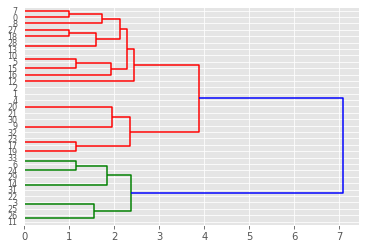

In [220]:
# Функция для построения дендрограммы
dn = dendrogram(link, orientation = "right")

Инорируем раскраску кластеров!

Иллюзия знания хуже незнания.

Интерпретация кластеров.

Сначала добавим к данным колонку cluster, в которую запишем номер кластера, в которую попал объект. Это сделаем с помощью функции fcluster. В качестве первого аргумента передаём объект linkage, полученный выше. Третьим аргументом criterion передаём критерий для разбиения на кластеры (distance для остановки разбиения по расстоянию между кластерами и maxclust для разбиения по заданному числу кластеров). Вторым же аргументом является либо пороговое значение для расстояния между кластерами, либо количество кластеров, в зависимости от аргумента criterion.

In [221]:
# Останавливаем объединение, если расстояние между кластерами превышает 3
df['cluster'] = fcluster(link, 3, criterion='distance')


Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода groupby с последующим применением группирующей функции.

In [222]:
hires=df.groupby('cluster').mean()
hires

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000



Также интересно узнать, сколько наблюдений попало в каждый кластер. Для этого также применяем вызов groupy с последующим применением метода size.

In [223]:
df.groupby('cluster').size()

cluster
1    11
2    11
3    12
dtype: int64

Что изменится, если выберем вариант решения с 2 кластерами?

Каменистая осыпь

А можно было выбрать число кластеров не на глаз по дендрограмме, а автоматически, тем более если данных много? Можно. Построим график, носящий название "каменистая осыпь". Напомним, в матрице link во второй колонке хранятся расстояния между парами слитых кластеров. По построению, строки матрицы упорядочены по этой колонке.

In [224]:
dist = link[:, 2]
dist

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.15470054, 1.15470054, 1.15470054,
       1.54919334, 1.58113883, 1.73205081, 1.82574186, 1.91485422,
       1.93649167, 2.12132034, 2.27636073, 2.33711814, 2.37920282,
       2.446395  , 3.87646865, 7.09212963])

Таким образом, можно построить график зависимости расстояний между кластерами от шага слияния (обратного), и посмотреть, начиная с какого момента это расстояние перестанет значительно меняться.

Text(22, 2.6, '4 clusters')

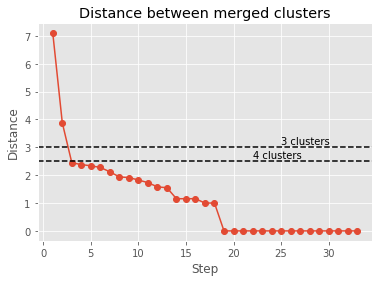

In [225]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(2.52, c='k', linestyle='dashed')
plt.text(25, 3.1, '3 clusters')
plt.text(22, 2.6, '4 clusters')

Из картинки видно, что если мы остановимся объединять кластеры при расстоянии равном примерно 2.5, мы получим 4 кластера, а при равном 3 -- 3 кластера.

Однако строго говоря, этот способ всё ещё немасштабируем для больших данных. Но его можно просто поправить, включая в график не все подряд слияния, а только несколько последних. И если уж мы совсем хотим автомаизировать процесс, то факт сильного изменения расстояний между кластерами можно фиксировать с помощью производной: там где график выходит на горизонталь, производная станет почти нулём.

# K-means

In [226]:
df = pd.read_csv("beverage_r.csv", sep=";", index_col='numb.obs')
df.head()

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
numb.obs,,,,,,,,
1,1,0,0,0,1,1,0,1
2,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0
4,0,1,0,1,0,0,1,0
5,1,0,0,0,1,0,0,0


Применим модель для разного числа кластеров, чтобы построить график каменистой осыпи. Метод inertia_ вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера. Таким образом, кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров.

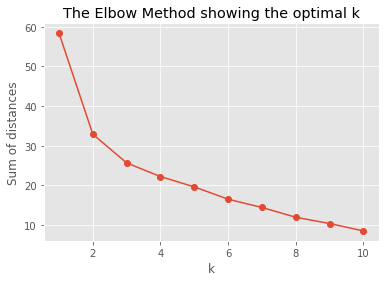

In [227]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [228]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
kmres=df.groupby('cluster').mean()
kmres

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


In [229]:
df.groupby('cluster').size()

cluster
0    11
1    11
2    12
dtype: int64

# Сравним результаты

In [230]:
hires

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
1,0.00,1.000000,0.545455,0.545455,0.000000,0.000000,0.909091,0.000000
2,1.00,0.272727,0.090909,0.000000,1.000000,0.000000,0.000000,0.272727
3,0.75,0.250000,0.083333,0.083333,0.416667,0.916667,0.083333,0.500000


In [231]:
kmres

,COKE,D_COKE,D_PEPSI,D_7UP,PEPSI,SPRITE,TAB,SEVENUP
cluster,,,,,,,,
0,0.727273,0.272727,0.090909,0.090909,0.454545,1.0,0.090909,0.454545
1,0.000000,1.000000,0.545455,0.545455,0.000000,0.0,0.909091,0.000000
2,1.000000,0.250000,0.083333,0.000000,0.916667,0.0,0.000000,0.333333


Получились похожие результаты по двум медотам

далее нумерация по иерархической кластеризации

В первом кластере выделились потребители, которые пьют только диетические напитки

Во втором кластере выделились любители колы

В третьем кластере потребители, пьющие газировки отдавая предпочтение классическим версиям напитков

# Пример 2. Кластеризация претендентов.


# Иерархическая кластеризация


In [232]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
df.head()

,NR,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,,
Volker,1,10,10,9,10,10,10,9,10,10,9
Sigrid,2,10,10,4,10,5,5,4,5,4,3
Elmar,3,5,4,10,5,10,4,10,5,3,10
Peter,4,10,10,9,10,10,10,9,10,10,9
Otto,5,4,3,5,4,3,10,4,10,10,5


In [233]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']

In [234]:
df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9
Sigrid,10,10,4,10,5,5,4,5,4,3
Elmar,5,4,10,5,10,4,10,5,3,10
Peter,10,10,9,10,10,10,9,10,10,9
Otto,4,3,5,4,3,10,4,10,10,5
Elke,10,10,4,10,5,4,3,4,5,5
Sarah,4,4,5,5,4,10,5,10,10,6
Peter,4,5,3,4,5,10,4,10,10,4
Gudrun,4,5,10,4,10,5,10,4,3,10


In [235]:
#    возможно, уже импортировали
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

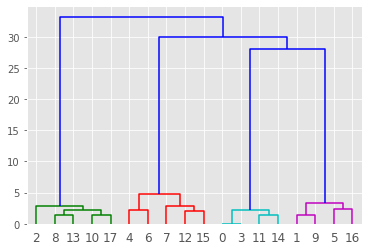

In [236]:
link = linkage(df, 'ward', 'euclidean')
dn = dendrogram(link)

In [237]:
link

array([[ 0.        ,  3.        ,  0.        ,  2.        ],
       [ 1.        ,  9.        ,  1.41421356,  2.        ],
       [ 8.        , 13.        ,  1.41421356,  2.        ],
       [10.        , 17.        ,  1.41421356,  2.        ],
       [11.        , 14.        ,  1.41421356,  2.        ],
       [12.        , 15.        ,  2.        ,  2.        ],
       [20.        , 21.        ,  2.23606798,  4.        ],
       [18.        , 22.        ,  2.23606798,  4.        ],
       [ 4.        ,  6.        ,  2.23606798,  2.        ],
       [ 5.        , 16.        ,  2.44948974,  2.        ],
       [ 7.        , 23.        ,  2.82842712,  3.        ],
       [ 2.        , 24.        ,  2.93257566,  5.        ],
       [19.        , 27.        ,  3.31662479,  4.        ],
       [26.        , 28.        ,  4.79583152,  5.        ],
       [25.        , 30.        , 28.01785145,  8.        ],
       [31.        , 32.        , 29.92940412, 13.        ],
       [29.        , 33.

In [238]:
dist = link[:, 2]
dist

array([ 0.        ,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        2.        ,  2.23606798,  2.23606798,  2.23606798,  2.44948974,
        2.82842712,  2.93257566,  3.31662479,  4.79583152, 28.01785145,
       29.92940412, 33.23097103])

Text(12, 5.3, '4 clusters')

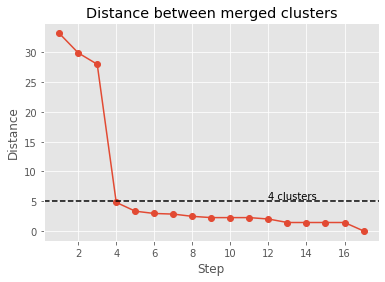

In [239]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
#plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(5, c='k', linestyle='dashed')
#plt.text(10, 3.1, '3 clusters')
plt.text(12, 5.3, '4 clusters')

In [240]:
df['cluster'] = fcluster(link, 4, criterion='maxclust')

In [241]:
hires=df.groupby('cluster').mean()
hires

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [242]:
df.groupby('cluster').size()

cluster
1    5
2    5
3    4
4    4
dtype: int64

# K-means

In [243]:
df = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del df['NR']
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
NAME,,,,,,,,,,
Volker,10,10,9,10,10,10,9,10,10,9
Sigrid,10,10,4,10,5,5,4,5,4,3
Elmar,5,4,10,5,10,4,10,5,3,10
Peter,10,10,9,10,10,10,9,10,10,9
Otto,4,3,5,4,3,10,4,10,10,5


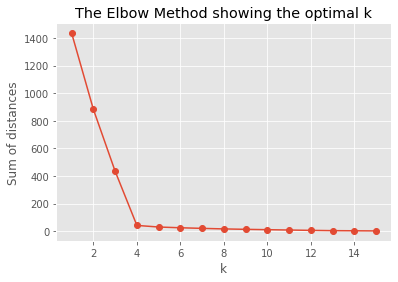

In [244]:
K = range(1, 16)
models = [KMeans(n_clusters=k).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [245]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
kmres=df.groupby('cluster').mean()
kmres

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50


In [246]:
df.groupby('cluster').size()

cluster
0    5
1    5
2    4
3    4
dtype: int64

# Сравним результаты

In [247]:
hires

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50
4,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25


In [248]:
kmres

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10
cluster,,,,,,,,,,
0,4.8,4.4,4.00,4.0,4.20,10.0,4.40,10.00,10.00,5.00
1,4.2,4.8,10.00,4.4,10.00,4.4,10.00,4.00,3.80,10.00
2,10.0,10.0,4.25,10.0,4.75,4.5,3.75,4.25,4.25,4.25
3,10.0,10.0,9.00,10.0,10.00,9.5,9.25,9.75,10.00,9.50



Получились похожие результаты по двум медотам

далее нумерация по иерархической кластеризации

В первом кластере выделились кандидаты, хорошо ответившие на Т3, Т5, Т7, Т10

Во втором кластере выделились кандидаты, хорошо ответившие на Т6,Т8,Т9

В третьем кластере выделились особо продвинутые кандидаты, очень хорошо ответившие на все вопросы

Во четвертом кластере выделились кандидаты, хорошо ответившие на Т1,Т2,Т4

# Пример 3. Потребление протеинов в Европе.


In [249]:
#os.chdir("3_Protein Consumption in Europe")

In [250]:
df = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
df.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


# Стандартизация данных


В этом примере данные, которые мы собираемся кластеризовать, хотя и находятся в одних и тех же единицах измерения, но местами они различаются почти на два порядка, так что будет не лишним их стандартизировать перед анализом.


В модуле preprocessing библиотеки sklearn реализованы несколько классов стандартизации данных:

StandardScaler -- приведение к нулевому среднему и единичной дисперсии.

MinMaxScaler -- приведение данных к отрезку [0, 1].

MaxAbsScaler -- приведение к [-1, 1] (рекомендуется для разреженных данных).

Замечание. У этих методов есть чуть более лёгкие методы-аналоги scale, minmax_scale и maxabs_scale, которые делают практически то же самое, но для supervized задач машинного обучения, которые встретяся позже, удобнее использовать именно изначально указанные классы.


Процесс стандартизации выглядит так:

In [251]:
from sklearn import preprocessing

# Выбираем один из вариантов нормализации

norm = preprocessing.StandardScaler()
# norm = preprocessing.MaxAbsScaler()
# norm = preprocessing.MinMaxScaler()

# вычисляем параметры нормализации (они будут сохранены внутри объекта norm)
norm.fit(df)
# преобразовываем данные с параметрами
X = norm.transform(df)
# Полученный на предыдущем шаге объект X -- это матрица класса numpy.ndarray.
# Глазами на неё смотреть неудобно, лучше преобразовать её в объект класса pandas.DataFrame.
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [252]:
X.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Albania,0.082941,-1.794750,-2.224584,-1.179570,-1.225033,0.934804,-2.295965,1.247968,-1.378251
Austria,-0.282974,1.686446,1.245621,0.400468,-0.655111,-0.395051,-0.422218,-0.910790,0.092789
Belgium,1.119699,0.387905,1.062979,0.055732,0.064791,-0.525246,0.889405,-0.499598,-0.076947
Bulgaria,-0.618396,-0.523837,-1.220051,-1.265754,-0.925074,2.273959,-1.983674,0.322786,0.036210
Czechoslovakia,-0.039031,0.968104,-0.124197,-0.662467,-0.685107,0.190830,0.452198,-1.013588,-0.076947


In [253]:
X[20:21]

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
Country,,,,,,,,,
Switzerland,0.997727,0.608933,0.149767,0.960663,-0.595119,-0.618243,-0.921884,-0.345401,0.432259


# Иерархическая кластеризация


In [254]:
link

array([[ 0.        ,  3.        ,  0.        ,  2.        ],
       [ 1.        ,  9.        ,  1.41421356,  2.        ],
       [ 8.        , 13.        ,  1.41421356,  2.        ],
       [10.        , 17.        ,  1.41421356,  2.        ],
       [11.        , 14.        ,  1.41421356,  2.        ],
       [12.        , 15.        ,  2.        ,  2.        ],
       [20.        , 21.        ,  2.23606798,  4.        ],
       [18.        , 22.        ,  2.23606798,  4.        ],
       [ 4.        ,  6.        ,  2.23606798,  2.        ],
       [ 5.        , 16.        ,  2.44948974,  2.        ],
       [ 7.        , 23.        ,  2.82842712,  3.        ],
       [ 2.        , 24.        ,  2.93257566,  5.        ],
       [19.        , 27.        ,  3.31662479,  4.        ],
       [26.        , 28.        ,  4.79583152,  5.        ],
       [25.        , 30.        , 28.01785145,  8.        ],
       [31.        , 32.        , 29.92940412, 13.        ],
       [29.        , 33.

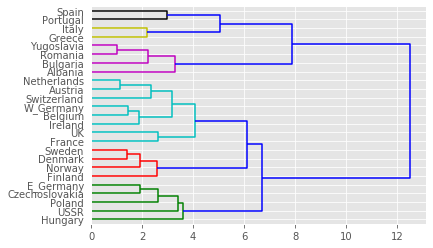

In [255]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # опция для более красивого отображения слишком ветввистой дендрограммы
                truncate_mode='lastp',
                # повернуть подписи вертикально
                color_threshold=4.3,
                orientation = "right",
                leaf_rotation=0.)

In [256]:
dist = link[:, 2]
dist

array([ 1.00656827,  1.14647572,  1.41015822,  1.44719737,  1.86462557,
        1.91517805,  1.9190385 ,  2.19446093,  2.21352258,  2.33259168,
        2.57601959,  2.62426927,  2.63512692,  2.99324882,  3.18929396,
        3.28315133,  3.42053002,  3.61647824,  4.08392143,  5.06494878,
        6.09034098,  6.6911646 ,  7.88428131, 12.49368046])

Text(12, 5.5, '6 clusters')

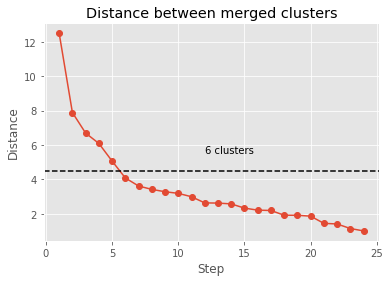

In [257]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')
#plt.axhline(3, c='k', linestyle='dashed')
plt.axhline(4.5, c='k', linestyle='dashed')
#plt.text(10, 3.1, '3 clusters')
plt.text(12, 5.5, '6 clusters')

In [258]:
df['cluster'] = fcluster(link, 6, criterion='maxclust')

In [259]:
hiresm=df.groupby('cluster').mean()
hiresm

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550


In [260]:
df.groupby('cluster').size()

cluster
1    5
2    4
3    8
4    4
5    2
6    2
dtype: int64

In [261]:
hires=df['cluster'].sort_values()
hires

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Greece            5
Italy             5
Portugal          6
Spain             6
Name: cluster, dtype: int32

# K-means

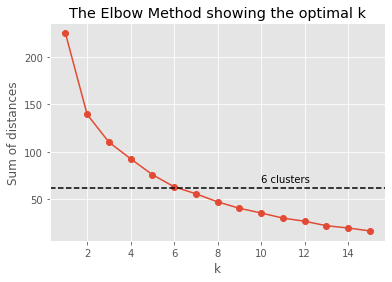

In [262]:
K = range(1, 16)
models = [KMeans(n_clusters=k).fit(X) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.axhline(62, c='k', linestyle='dashed')
plt.text(10, 68, '6 clusters')
plt.show()

In [263]:
model = KMeans(n_clusters=6,random_state=42)
model.fit(df)
df['cluster'] = model.labels_
kmresm=df.groupby('cluster').mean()
kmresm

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,12.677778,10.744444,3.955556,20.044444,3.600000,24.688889,4.855556,1.922222,4.111111
1,9.650000,3.525000,2.075000,14.200000,3.125000,41.100000,2.825000,5.250000,4.450000
2,6.133333,5.766667,1.433333,9.633333,0.933333,54.066667,2.400000,4.900000,3.400000
3,6.650000,3.550000,2.100000,6.750000,10.600000,28.100000,5.800000,5.300000,7.550000
4,9.850000,7.050000,3.150000,26.675000,8.225000,22.675000,4.550000,1.175000,2.125000
5,7.300000,11.333333,2.800000,13.833333,1.766667,36.833333,4.966667,2.833333,4.933333


In [264]:
kmres=df['cluster'].sort_values()
kmres

Country
Austria           0
Belgium           0
UK                0
Switzerland       0
E_Germany         0
Netherlands       0
France            0
W_Germany         0
Ireland           0
Albania           1
USSR              1
Italy             1
Greece            1
Romania           2
Bulgaria          2
Yugoslavia        2
Portugal          3
Spain             3
Finland           4
Norway            4
Sweden            4
Denmark           4
Poland            5
Czechoslovakia    5
Hungary           5
Name: cluster, dtype: int32

# Сравним результаты¶

In [265]:
hiresm

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
1,7.9200,10.0400,2.8400,13.8400,2.740,35.740,5.56,2.5400,4.260
2,9.8500,7.0500,3.1500,26.6750,8.225,22.675,4.55,1.1750,2.125
3,13.2125,10.6375,3.9875,21.1625,3.375,24.700,4.65,2.0625,4.175
4,7.1250,4.6750,1.2000,9.4500,0.750,51.125,1.95,5.0500,2.975
5,9.6000,4.0500,2.8500,15.6500,4.650,39.250,2.15,6.0500,6.600
6,6.6500,3.5500,2.1000,6.7500,10.600,28.100,5.80,5.3000,7.550


In [266]:
kmresm

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
cluster,,,,,,,,,
0,12.677778,10.744444,3.955556,20.044444,3.600000,24.688889,4.855556,1.922222,4.111111
1,9.650000,3.525000,2.075000,14.200000,3.125000,41.100000,2.825000,5.250000,4.450000
2,6.133333,5.766667,1.433333,9.633333,0.933333,54.066667,2.400000,4.900000,3.400000
3,6.650000,3.550000,2.100000,6.750000,10.600000,28.100000,5.800000,5.300000,7.550000
4,9.850000,7.050000,3.150000,26.675000,8.225000,22.675000,4.550000,1.175000,2.125000
5,7.300000,11.333333,2.800000,13.833333,1.766667,36.833333,4.966667,2.833333,4.933333


In [267]:
hires

Country
Poland            1
USSR              1
Czechoslovakia    1
E_Germany         1
Hungary           1
Sweden            2
Norway            2
Denmark           2
Finland           2
Netherlands       3
W_Germany         3
France            3
UK                3
Switzerland       3
Belgium           3
Austria           3
Ireland           3
Albania           4
Yugoslavia        4
Romania           4
Bulgaria          4
Greece            5
Italy             5
Portugal          6
Spain             6
Name: cluster, dtype: int32

In [268]:
kmres

Country
Austria           0
Belgium           0
UK                0
Switzerland       0
E_Germany         0
Netherlands       0
France            0
W_Germany         0
Ireland           0
Albania           1
USSR              1
Italy             1
Greece            1
Romania           2
Bulgaria          2
Yugoslavia        2
Portugal          3
Spain             3
Finland           4
Norway            4
Sweden            4
Denmark           4
Poland            5
Czechoslovakia    5
Hungary           5
Name: cluster, dtype: int32

In [269]:
Мы также получили схожие результаты
Но все же разбиение различается

Полученые иерархическйо кластеризацией данные выглядят лучше

Первый кластер-основная часть европейских стран. они употребляют Мясо, молоко и злаки. 

Мы выделили (второй)кластер стран с самыми плодородными землями, умеренным климатом, в котором возможно выращивать и изготавливать многие продукты питания.

В третьем-преобладает употребление злаковых культур. 

В четвертый кластер вошли страны венгрия,польша, СССР и чехословакия- в них предпочитают потреблять злаки, молоко и белое мясо. 

В пятом и шестом- Южные страны с хорошим климатом, морским воздухом.Все продукты присутствуют, но не в таких больших размерах, как в последнем кластере. Но привычное питане в этих двух кластерах все же различно 



SyntaxError: invalid syntax (<ipython-input-269-95172113d4e9>, line 1)